### Exercise

- Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
- Figure out if any preprocessing such as scaling would help here
- Draw elbow plot and from that figure out optimal value of k

With Petal only

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.drop(['sepal length (cm)','sepal width (cm)','target'],axis= 1, inplace=True)

In [5]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

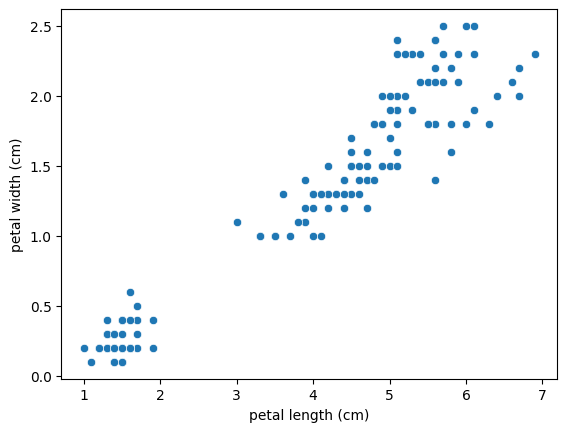

In [6]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',data=df)

In [7]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [8]:
y_pred = km.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
df['cluster'] = y_pred
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [10]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

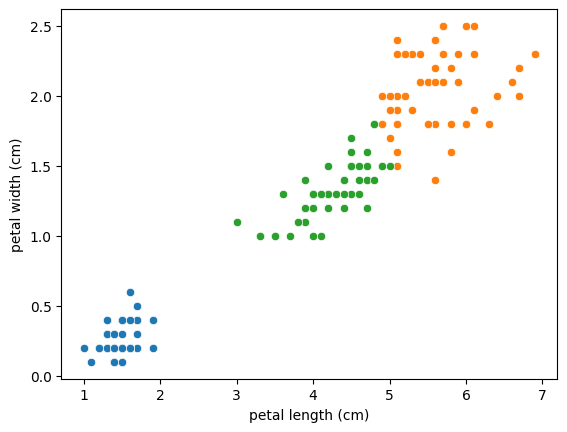

In [11]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',data=df0)
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',data=df1)
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',data=df2)

In [12]:
n_rng = range(1,10)
sse = []
for k in n_rng:
    km = KMeans(k)
    km.fit(df)
    sse.append(km.inertia_)

In [13]:
sse

[652.8686666666665,
 112.32080000000002,
 31.371358974358984,
 22.649637861231326,
 14.190205868205869,
 11.507954545454545,
 9.375929682064694,
 7.8055473684210535,
 6.868081395797187]

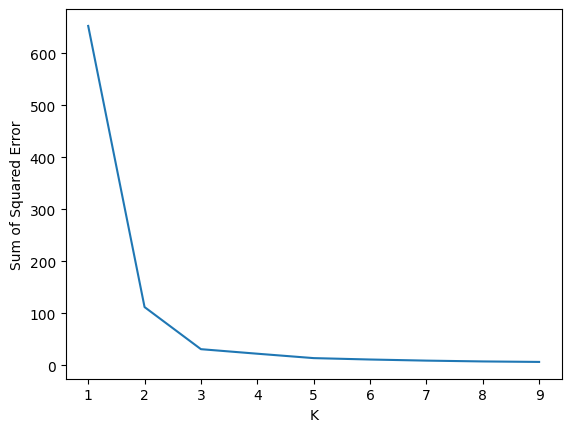

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(n_rng,sse)
plt.show()